# Plotting Figure S4

This script is used to plot Figure S4 RMSE

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import time
import gc
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shapereader

In [2]:
def setup_globe(ax):
    ax.set_global() 
    ax.coastlines(zorder=5)
#     ax.add_feature(cartopy.feature.LAND, facecolor='lightgray',zorder=0)
    ax.add_feature(cartopy.feature.LAKES, facecolor='none',edgecolor='black',
                   linewidth=0.5,zorder=5)
    shpfile = shapereader.Reader("../../5_event_analysis/shapefile/maps.shp")
    shape_feature = cfeature.ShapelyFeature(shpfile.geometries(),
                                            ccrs.PlateCarree())
    ax.add_feature(shape_feature,
                   facecolor='none',
                   edgecolor='black',
                   linewidth=0.5,zorder=5)


def setup_colorbar_text(ax,p,title_text,var_text):
    ax.set_xlabel("")
    ax.set_ylabel("")
    cbar = plt.colorbar(p, ax=ax,
                    orientation="vertical",
                    fraction=0.1,
                    shrink=0.75,
                    pad=0.02,
                    aspect=30,
                    extend="neither")
    g = ax.gridlines(color='grey', linestyle='--', draw_labels=False,zorder=4)
    g.xlocator = mticker.FixedLocator([-90, 0, 90])
    lon_formatter = LongitudeFormatter()#zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    props = dict(boxstyle='round', facecolor='lightcyan')
    # place a text box in upper left in axes coords
    ax.text(0.03, 0.12, var_text, transform=ax.transAxes, fontsize=15,
             verticalalignment='top', bbox=props,zorder=6)
    ax.set_title(title_text)
    
def plot_scatter(ax,df,vmin,vmax,cmap):
    df_temp = df.copy()
    df_temp["lon_new"] = np.where(df_temp['lon'] <= 180, 
                                  df_temp['lon'], 
                                  df_temp['lon']-360)
    p = ax.scatter(df_temp["lon"],df_temp["lat"],c=df_temp["0"],
                   s=0.5,
                   vmin=vmin,
                   vmax=vmax,
                   cmap=cmap,
                   zorder=3,rasterized=True)
    
    return p
    
def plot_map(df,i,vmin,vmax,cmap,title_text,var_text):
    ax = plt.subplot(2,1,i+1,projection=ccrs.PlateCarree())
    setup_globe(ax)
    ax.set_yticks(np.array([-60,-30,0,30,60]), crs=ccrs.PlateCarree())
    ax.set_xticks(np.linspace(-90, 90, 3), crs=ccrs.PlateCarree())
    
#     if i==0: 
#         ax.set_yticks(np.array([-60,-30,0,30,60]), crs=ccrs.PlateCarree())
#         ax.set_xticks(np.linspace(-90, 90, 3), crs=ccrs.PlateCarree())
#     elif i==1:
#         ax.set_xticks(np.linspace(-90, 90, 3), crs=ccrs.PlateCarree())
    p = plot_scatter(ax,df,vmin,vmax,cmap)
    setup_colorbar_text(ax,p,title_text,var_text) 

,lat,lon,0
count,4439.000000,4439.000000,4439.000000
mean,23.864969,131.385729,0.728594
std,25.646228,111.895429,0.283106
min,-54.188499,0.000000,0.129773
25%,8.952900,36.250000,0.514821
50%,29.685900,100.000000,0.723261
75%,42.879601,260.000000,0.895908
max,70.209396,358.750000,1.726327


,lat,lon,0
count,4439.000000,4439.000000,4439.000000
mean,23.864969,131.385729,0.725304
std,25.646228,111.895429,0.263574
min,-54.188499,0.000000,0.111506
25%,8.952900,36.250000,0.535996
50%,29.685900,100.000000,0.732210
75%,42.879601,260.000000,0.880012
max,70.209396,358.750000,1.695290


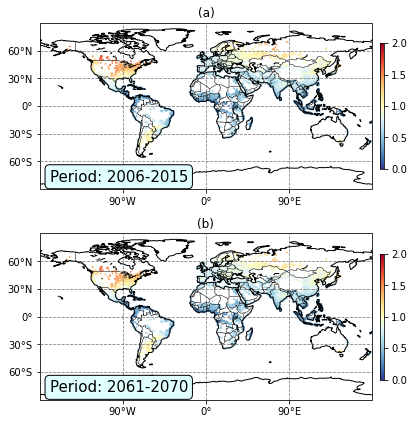

In [3]:
fig = plt.figure(figsize=(6,6))
cmap="RdYlBu_r"

save_dir = "S3://uhws/UHWs_CESM/model-validation/"
title_text_dict = {"2006":"(a)",
                   "2061":"(b)"}

var_text_dict = {"2006":"Period: 2006-2015",
                 "2061":"Period: 2061-2070"}

max_val={"2006":2,
         "2061":2}

min_val={"2006":0,
         "2061":0}

year_ls = ["2006","2061"]

for i in range(2):
    year = year_ls[i]
    df = pd.read_csv(save_dir+year+"/rmse_by_lat_lon_mean.csv")
    display(df.describe())
    plot_map(df.reset_index(),
             i,min_val[year], max_val[year],
             cmap,title_text_dict[year],var_text_dict[year])

plt.tight_layout()
plt.savefig("../../figures/figures_rmse.pdf",dpi=188)
plt.show()